# **Statistics you Should Show to Your Anti-Vaccine Friend**
### _By: Victorio H. S. Maculan_

With the popularization of the internet, we entered the era of Fake News and misleading information, causing big social, political, and economic changes. In the social situation, the misleading pieces of information increased the level of vaccine hesitancy (Besides other kinds of scientific negligence), causing many diseases to spread and many lives to be lost.

**In several epidemics and pandemics, the vaccines saved many lives, and this is what we're going to analyze today: The vaccine relation to cases and deaths (During three epidemics/pandemics), and how the anti-vaccine activists influenced these numbers.**

Firstly, we need to get everything ready.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import locale

In [2]:
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8'); # To deal with international data fromats

## **COVID-19 Pandemic**
We will start with the most recent pandemic: [COVID-19 2019 Pandemic](https://en.wikipedia.org/wiki/COVID-19_pandemic).

Let's start by analyzing the cases and deaths in the European continent, because the vaccination started here.

In [3]:
covid = pd.read_csv('../databases/covid19-cases-and-deaths.csv', parse_dates=['Date_reported'])
covid_vacs = pd.read_csv('../databases/covid19-vaccination-data.csv', index_col='COUNTRY')

In [4]:
global_cases = covid.groupby(['WHO_region', 'Date_reported'])['New_cases'].sum()
global_deaths = covid.groupby(['WHO_region', 'Date_reported'])['New_deaths'].sum()

europe_cases = global_cases.loc['EURO']
europe_deaths = global_deaths.loc['EURO']

europe_cases.name = 'EURO Cases'
europe_deaths.name = 'EURO Deaths'

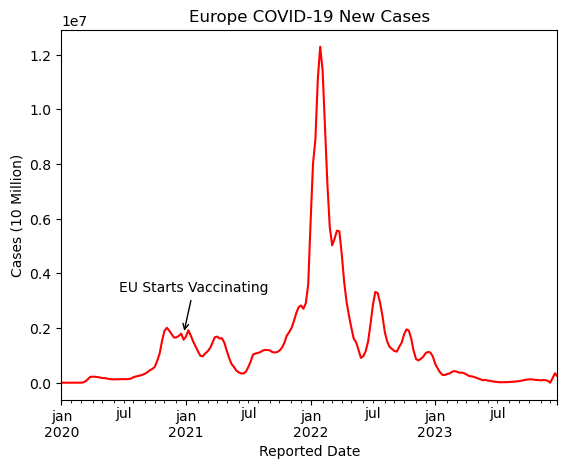

In [5]:
graph = europe_cases.plot(title='Europe COVID-19 New Cases', 
                          xlabel='Reported Date', ylabel='Cases (10 Million)',
                          color='red');
graph.annotate('EU Starts Vaccinating', 
               xy=('12-21-2020', europe_cases.loc['2020-12-20']), # Nearest register possible to 12-21-2020 (For y axis)
               xytext=('06-21-2020', europe_cases.loc['2020-12-06']*2), # Text position 
               arrowprops=dict(color='black', arrowstyle='->'));

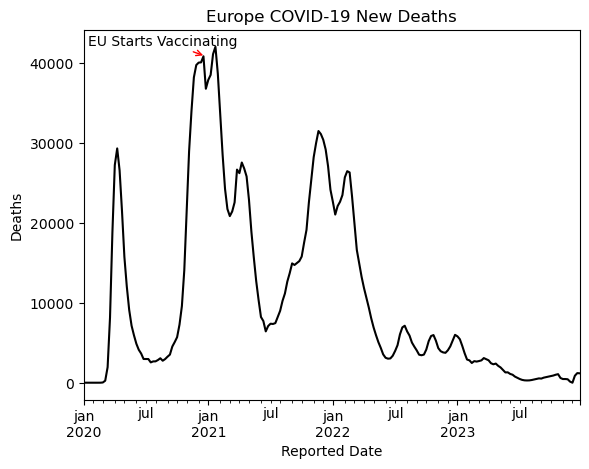

In [6]:
graph2 = europe_deaths.plot(title='Europe COVID-19 New Deaths', 
                  xlabel='Reported Date', ylabel='Deaths',
                 color='black')
graph2.annotate('EU Starts Vaccinating', 
               xy=('12-21-2020', europe_deaths.loc['2020-12-20']), # Nearest register possible to 12-21-2020 (For y axis)
               xytext=('01-15-2020', 42300), # Text position 
               arrowprops=dict(color='red', arrowstyle='->'));

The first country in the world to start vaccinating its citizens was The United Kingdom on 12-08-2020[\*](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_Kingdom#:~:text=Vaccinations%20began%20on%208%20December%202020).

Several days later, on 12-21-2020 many other countries from the European Union (EU) also started vaccinating. That day is indicated as "EU Starts Vaccinating" on both graphs above.

In the first graph (Which features the "Europe COVID-19 New Cases") we can see that there is not any significant change in the number of cases after the start of the vaccination, in fact, **the COVID-19 vaccine doesn't protect from getting infected, but lower the chances of death**.

In the second graph (Featuring "Europe COVID-19 New Deaths"), after the vaccination, we notice an immediate fall in the number of deaths, that, besides two small peaks, keep going down until July 2021. 

It gets even more impressive when we consider that **in the period of the peak of new cases (July 2021 to July 2022) the number of cases was approximately 3.3 times higher than in the same period of last year in which the vaccination had just started (July 2020 to July 2021). Still, the number of deaths was approximately 1.2 times lower.**

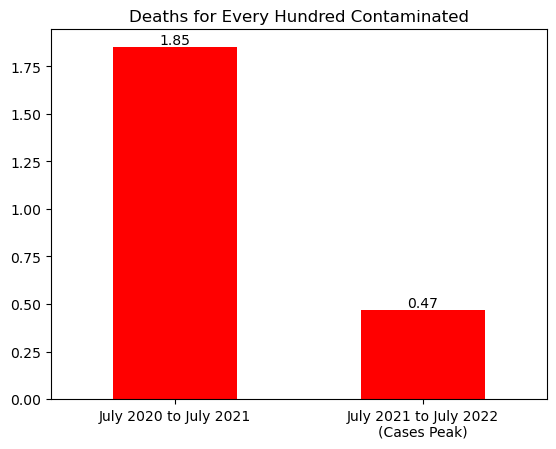

In [7]:
peak1 = pd.merge(europe_cases['2020-07':'2021-07'], europe_deaths['2020-07':'2021-07'],
                right_index=True, left_index=True).sum()
peak2 = pd.merge(europe_cases['2021-07':'2022-07'], europe_deaths['2021-07':'2022-07'],
                right_index=True, left_index=True).sum()

peaks_pct = pd.Series({'peak1': peak1['EURO Deaths'] * 100 / peak1['EURO Cases'], 
                       'peak2': peak2['EURO Deaths'] * 100 / peak2['EURO Cases']})

graph3 = peaks_pct.plot.bar(title='Deaths for Every Hundred Contaminated', color='red')
graph3.set_xticklabels(['July 2020 to July 2021', 'July 2021 to July 2022\n(Cases Peak)'], rotation=360)
plt.bar_label(graph3.containers[0], peaks_pct.round(2));

**Now, we're going to take a look at the countries with the most deaths from COVID-19 and their vaccination rates**, they are, respectively, United States of America, Brazil, India, Russia, and Mexico.

In [8]:
columns = ['PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_LAST_DOSE_PER100', 
           'PERSONS_BOOSTER_ADD_DOSE_PER100']

global_vacs = covid_vacs[columns]
global_vacs.columns = ['1+ Doses', 'Last Dose', 'Additional Dose']

deaths_by_country = covid.groupby('Country')['New_deaths'].sum()
deaths_by_country.sort_values(ascending=False, inplace=True)

most_aff_deaths = deaths_by_country[0:5]
most_aff_vacs = global_vacs.loc[most_aff_deaths.index]

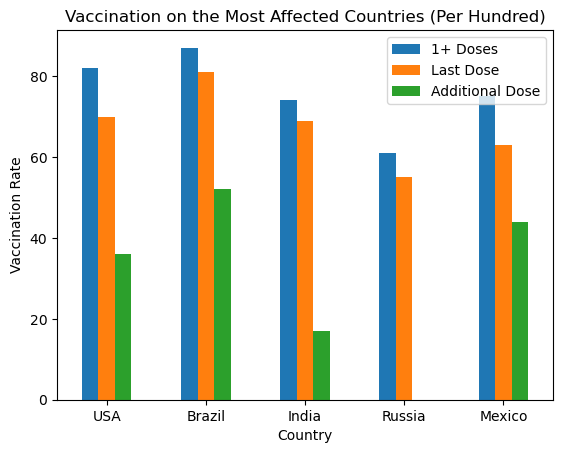

In [9]:
graph4 = most_aff_vacs.plot.bar(title='Vaccination on the Most Affected Countries (Per Hundred)', 
                                ylabel='Vaccination Rate')
graph4.set_xticklabels(['USA', 'Brazil', 'India', 'Russia', 'Mexico'], rotation=360);

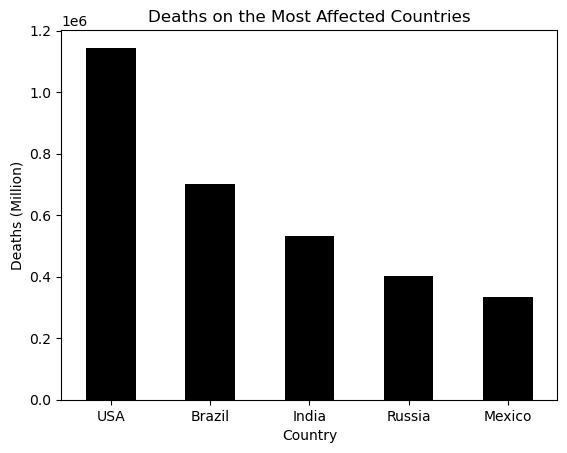

In [10]:
graph5 = most_aff_deaths.plot.bar(title='Deaths on the Most Affected Countries', color='black', 
                                  ylabel='Deaths (Million)')
graph5.set_xticklabels(['USA', 'Brazil', 'India', 'Russia', 'Mexico'], rotation=360);

The first graph shows the vaccination rates of the most affected countries. It's noticeable that the vaccination rate is not very impressive. **In fact, the most vaccinated country on the list, Brazil, is only in 31st place on the global vaccine rate ranking, followed by the USA (55th place), Mexico (89th place), India (98th place), and Russia (120th place).**

Another detail that should not be overlooked is that many of these countries have strong anti-vaccine intensifier, like [a strong anti-vaccine movement](https://en.wikipedia.org/wiki/COVID-19_vaccine_hesitancy_in_the_United_States), [an important public figure's anti-vaccine speech](https://www.bbc.com/news/technology-52106321), [social problems or ideological/religious belief](https://carnegieindia.org/2022/04/04/combating-vaccine-hesitancy-in-india-pub-86795#:~:text=Other%20obstacles%20include%20linguistic%20barriers%20to%20access%20appropriate%20information%2C%20religious%20and%20ideological%20beliefs%2C%20difficulty%20reaching%20the%20vaccination%20centers%2C%20inequitable%20access%20to%20the%20health%20system%2C%20and%20mistrust%20in%20the%20system.), or even [a preference for alternative medice](https://www.thinkglobalhealth.org/article/why-arent-russians-getting-vaccinated#:~:text=The%C2%A0anti%2Dvaccine%20furor%20of%20the%20late%201980s%20found%20fertile%20ground%C2%A0in%20a%20society%C2%A0with%C2%A0deep%20historical%20roots%C2%A0in%20alternative%20medicine.).

In the second graph, for comparison, are the number of deaths on each of the most affected countries.

In [35]:
data = covid_vacs.reset_index()[['COUNTRY', 'TOTAL_VACCINATIONS_PER100']]

data.sort_values('TOTAL_VACCINATIONS_PER100', ascending=False, inplace=True)
data.set_index('COUNTRY', inplace=True)
data['RANKING (GLOBAL)'] = np.arange(1, len(data)+1)

most_aff = data.loc[most_aff_vacs.index]
most_aff.rename(columns={'TOTAL_VACCINATIONS_PER100': 'TOTAL VACCINATIONS PER HUNDRED'}, inplace=True)
most_aff.sort_values('TOTAL VACCINATIONS PER HUNDRED', ascending=False)

,TOTAL VACCINATIONS PER HUNDRED,RANKING (GLOBAL)
Country,,
Brazil,243.0,31
United States of America,215.0,55
Mexico,173.0,89
India,160.0,98
Russian Federation,128.0,120


## **Brazil's Measles Epidemic**
Let's have a look at [Brazil's 2018 Measles Epidemic](https://en.wikipedia.org/wiki/Measles#Brazil) data.

In [12]:
measles = pd.read_excel('../databases/measles-brazil.xlsx', dtype='string')
measles = measles.iloc[0][2:]
measles.sort_index(ascending=True, inplace=True)
measles.dropna(inplace=True)

measles = measles.map(locale.atof)

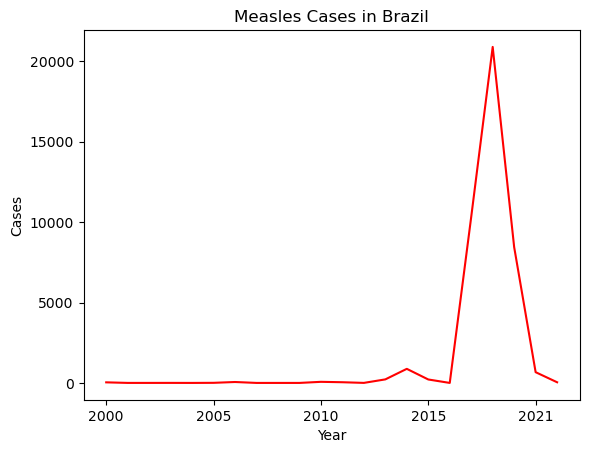

In [13]:
graph6 = measles.plot(title='Measles Cases in Brazil', xlabel='Year', ylabel='Cases', 
                      color='red');

We can see in the graph above that measles was almost eradicated in Brazil until 2018, when it increased substantially, finally hitting its peak in 2019 with more than twenty thousand infections. Fortunately, the cases decreased during 2020 and 2021, and by the end of 2022, it was almost eradicated again.

**Not by a coincidence, the increase in cases happened when the vaccination coverage dropped from 92% to 76%[\*](https://g1.globo.com/bemestar/blog/ana-escobar/post/2020/01/01/por-que-o-sarampo-voltou.ghtml#:~:text=A%20cobertura%20vacinal%20caiu%20nestes%20%C3%BAltimos%20anos%2C%20de%2092%25%20para%2076%25).** Without any increase in the vaccination rate, the number of cases started going down thanks to the [distancing measure of the COVID-19 pandemic](https://www.paho.org/en/news/9-2-2023-vaccination-coverage-declines-paho-warns-potential-measles-outbreaks#:~:text=confirmed%20cases%20declined%20and%20in%202022%2C%20thanks%20to%20the%20social%20distancing%20measures%20imposed%20during%20the%20COVID%2D19%20pandemic).

## **Yellow Fever in Africa**
Last but not least important, let's check the [Yellow Fever](https://en.wikipedia.org/wiki/Yellow_fever) situation in Africa.

In [14]:
yf = pd.read_excel('../databases/yf-africa.xlsx', dtype='string')
yf = yf.iloc[0][2:]
yf.sort_index(ascending=True, inplace=True)
yf = yf.map(locale.atof)

yf_vacs = pd.read_excel('../databases/yf-vacs-africa.xlsx')
yf_vacs = yf_vacs.set_index('YEAR')['COVERAGE'][:2000]
yf_vacs.sort_index(ascending=True, inplace=True)

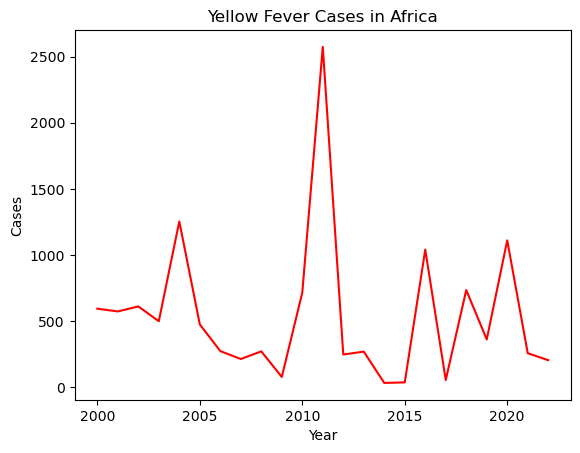

In [15]:
yf.plot(title='Yellow Fever Cases in Africa', xlabel='Year', ylabel='Cases',
       color='red');

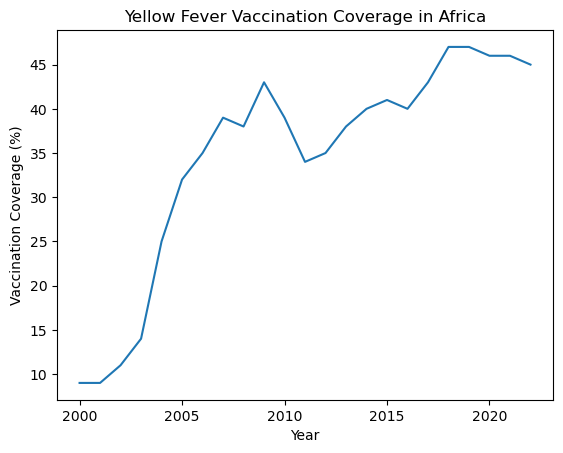

In [16]:
yf_vacs.plot(title='Yellow Fever Vaccination Coverage in Africa', xlabel='Year', 
              ylabel='Vaccination Coverage (%)');

Analysing both graphs above we can see that they follow each other. After a peak of infections in 2004 [WHO intensified their operations in Africa](https://iris.who.int/bitstream/handle/10665/241250/WER8350_450-458.PDF), the vaccination coverage increased during 2004, as the virus spread.

In 2005 the vaccination coverage continued to increase as the infections decreased, and this kept happening until 2010 when the coverage lowered and the infections started going up. **In the following year (2011) we have the highest number of cases ever registered and the lowest vaccination coverage since 2005**.

After 2011 the number of cases digreases as the coverage increases. In 2015 a lot of oscilation starts because of the [Yellow Fever outbreak in Angola](https://reliefweb.int/report/democratic-republic-congo/yellow-fever-outbreak-angola-and-democratic-republic-congo-ends).

## **_Conclusion_**

**With these statistics we can see that low rates of vaccination result in a higher number of deaths/cases, and that anti-vaccine activism can influence the vaccination rate, consequently causing more fatalities.** In the end, vaccinating or not is an individual choice, but propagating misleading information is a crime, and should be punished as one.

## **_A Message for Anti-vaxxer_**

Think for a second about all the theories that you heard about the vaccines. Maybe you heard that vaccines only work to fill the pockets of big pharmaceutical companies, but then why do all doctors recomend them? Or maybe you heard that vaccines kill people or cause diseases, but think about everyone who got vaccinated and didn't die or get sick. Take some time to think about these theories and reasons you should or shouldn't take the vaccine.

In the end, the choice of getting vaccinated or not is yours, but spreading misleading information you or other people created is a crime and may cause someone to lose their live. **So don't be a murderer, don't spread Fake News about vaccines**.

## **_References_**

All information was obtained from trustable sources, **many of them are hyperlinked on the texts**.

Datasets were collected from WHO (World Health Organization):

https://data.who.int/dashboards/covid19/data

https://immunizationdata.who.int/pages/incidence/MEASLES.html?CODE=BRA&YEAR=

https://immunizationdata.who.int/pages/incidence/MUMPS.html?CODE=Global&DISEASE=MUMPS

Some other sources were also used:

https://en.wikipedia.org/wiki/History_of_COVID-19_vaccine_development

https://www.dovepress.com/a-global-map-of-covid-19-vaccine-acceptance-rates-per-country-an-updat-peer-reviewed-fulltext-article-JMDH